In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Data/PublicationsWAddresses.csv')

In [3]:
valid_departments = ['Business IT', 'Computer Science', 'Digital Design']

In [4]:
def plot_cumulative_publications(df, years, top_n=10, international_cummulated=False, department=None):
    """
    Plots the cumulative number of publications for the top N countries up to each year.
    Optionally, when `international_cummulated=True`, plots national publications (Denmark) 
    against cumulative international publications (all other countries combined).
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on cumulative publications.
    - international_cummulated (bool): Whether to plot Denmark vs. all other countries aggregated.
    - department (str, optional): Filter for rows with 'Business IT', 'Computer Science', or 'Digital Design'.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)
    
    # Filter the dataframe for the specified department, if provided
    if department:
        valid_departments = ['Business IT', 'Computer Science', 'Digital Design']
        if department in valid_departments:
            department_col_map = {
                'Business IT': 'Business IT',
                'Computer Science': 'Computer Science',
                'Digital Design': 'Digital Design'
            }
            # Select only rows where the department column value is 1
            df = df[df[department_col_map[department]] == 1]

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Sort the pivot table by year to ensure correct cumulative sum
    pivot_df = pivot_df.sort_index()

    # Compute the cumulative sum over the years
    cumulative_df = pivot_df.cumsum()

    # Create a title prefix based on department
    title_prefix = f"Cumulative Publications ({department})" if department else "Cumulative Publications"

    if international_cummulated:
        # Separate "National" (Denmark) and "International" (all other countries combined)
        cumulative_df['International'] = cumulative_df.drop(columns='Denmark', errors='ignore').sum(axis=1)
        cumulative_df['National'] = cumulative_df['Denmark'] if 'Denmark' in cumulative_df.columns else 0

        # Prepare the data for plotting
        plot_df = cumulative_df[['National', 'International']]

        # Plotting
        plt.figure(figsize=(14, 8))
        for col in plot_df.columns:
            plt.plot(plot_df.index, plot_df[col], marker='o', label=col)

        plt.title(f'{title_prefix}: National (Denmark) vs. International', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Cumulative Number of Publications', fontsize=14)
        plt.legend(title='Category', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        # Select the top N countries based on the latest cumulative counts
        top_countries = cumulative_df.iloc[-1].nlargest(top_n).index

        # Filter the cumulative dataframe to include only the top N countries
        cumulative_top_df = cumulative_df[top_countries]

        # Plotting
        plt.figure(figsize=(14, 8))
        for country in top_countries:
            plt.plot(cumulative_top_df.index, cumulative_top_df[country], marker='o', label=country)

        plt.title(f'{title_prefix} by Top Countries Over Time', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Cumulative Number of Publications', fontsize=14)
        plt.legend(title='Country', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()


In [5]:
def plot_publications(df, years, top_n=10, international_cummulated=False, department=None):
    """
    Plots the number of publications per year for the top N countries.
    Optionally, when `international_cummulated=True`, plots national publications (Denmark) 
    against cumulative international publications (all other countries combined).
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on total publications.
    - international_cummulated (bool): Whether to plot Denmark vs. all other countries aggregated.
    - department (str, optional): Filter for rows with 'Business IT', 'Computer Science', or 'Digital Design'.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)
    
    # Filter the dataframe for the specified department, if provided
    if department:
        valid_departments = ['Business IT', 'Computer Science', 'Digital Design']
        if department in valid_departments:
            department_col_map = {
                'Business IT': 'Business IT',
                'Computer Science': 'Computer Science',
                'Digital Design': 'Digital Design'
            }
            # Select only rows where the department column value is 1
            df = df[df[department_col_map[department]] == 1]

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Create a title prefix based on department
    title_prefix = f"Number of Publications ({department})" if department else "Number of Publications"

    if international_cummulated:
        # Aggregate all countries except Denmark as 'International' and keep 'National' (Denmark)
        pivot_df['International'] = pivot_df.drop(columns='Denmark', errors='ignore').sum(axis=1)
        pivot_df['National'] = pivot_df['Denmark'] if 'Denmark' in pivot_df.columns else 0

        # Prepare the data for plotting
        plot_df = pivot_df[['National', 'International']]

        # Plotting
        plt.figure(figsize=(14, 8))
        for col in plot_df.columns:
            plt.plot(plot_df.index, plot_df[col], marker='o', label=col)

        plt.title(f'{title_prefix}: National (Denmark) vs. International', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Number of Publications', fontsize=14)
        plt.legend(title='Category', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        # Select the top N countries based on total publications
        top_countries = pivot_df.sum().nlargest(top_n).index

        # Filter the pivot dataframe to include only the top N countries
        top_df = pivot_df[top_countries]

        # Plotting
        plt.figure(figsize=(14, 8))
        for country in top_countries:
            plt.plot(top_df.index, top_df[country], marker='o', label=country)

        plt.title(f'{title_prefix} by Top Countries Over Time', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Number of Publications', fontsize=14)
        plt.legend(title='Country', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()


In [6]:
def plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='trailing', international_cummulated=False, department=None):
    """
    Plots the smoothed number of publications per year for the top N countries using different smoothing methods.
    Optionally, when `international_cummulated=True`, plots national publications (Denmark) 
    against cumulative international publications (all other countries combined).
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on total publications.
    - window (int): The window size for the moving average smoothing.
    - smoothing (str): The smoothing method to use: 'trailing', 'centered', or 'gaussian'.
    - international_cummulated (bool): Whether to plot Denmark vs. all other countries aggregated.
    - department (str, optional): Filter for rows with 'Business IT', 'Computer Science', or 'Digital Design'.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)
    
    # Filter the dataframe for the specified department, if provided
    if department:
        valid_departments = ['Business IT', 'Computer Science', 'Digital Design']
        if department in valid_departments:
            department_col_map = {
                'Business IT': 'Business IT',
                'Computer Science': 'Computer Science',
                'Digital Design': 'Digital Design'
            }
            # Select only rows where the department column value is 1
            df = df[df[department_col_map[department]] == 1]

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Create a title prefix based on department
    title_prefix = f"Smoothed Number of Publications ({department})" if department else "Smoothed Number of Publications"

    if international_cummulated:
        # Aggregate all countries except Denmark as 'International' and keep 'National' (Denmark)
        pivot_df['International'] = pivot_df.drop(columns='Denmark', errors='ignore').sum(axis=1)
        pivot_df['National'] = pivot_df['Denmark'] if 'Denmark' in pivot_df.columns else 0

        # Prepare the data for smoothing
        plot_df = pivot_df[['National', 'International']]

        # Apply smoothing based on the specified method
        if smoothing == 'trailing':
            smoothed_df = plot_df.rolling(window=window, min_periods=1).mean()
        elif smoothing == 'centered':
            smoothed_df = plot_df.rolling(window=window, min_periods=1, center=True).mean()
        elif smoothing == 'gaussian':
            smoothed_df = plot_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
        else:
            raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

        # Plotting
        plt.figure(figsize=(14, 8))
        for col in smoothed_df.columns:
            plt.plot(smoothed_df.index, smoothed_df[col], marker='o', label=col)

        plt.title(f'{title_prefix}: National (Denmark) vs. International ({smoothing.capitalize()} Smoothing)', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Number of Publications', fontsize=14)
        plt.legend(title='Category', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        # Select the top N countries based on total publications
        top_countries = pivot_df.sum().nlargest(top_n).index

        # Filter the pivot dataframe to include only the top N countries
        top_df = pivot_df[top_countries]

        # Apply smoothing based on the specified method
        if smoothing == 'trailing':
            smoothed_df = top_df.rolling(window=window, min_periods=1).mean()
        elif smoothing == 'centered':
            smoothed_df = top_df.rolling(window=window, min_periods=1, center=True).mean()
        elif smoothing == 'gaussian':
            smoothed_df = top_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
        else:
            raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

        # Plotting
        plt.figure(figsize=(14, 8))
        for country in top_countries:
            plt.plot(smoothed_df.index, smoothed_df[country], marker='o', label=country)

        plt.title(f'{title_prefix} by Top Countries Over Time ({smoothing.capitalize()} Smoothing)', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Number of Publications', fontsize=14)
        plt.legend(title='Country', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()


In [7]:
import matplotlib.pyplot as plt

def plot_publications_derivative(df, years, top_n=10, window=3, smoothing='trailing', international_cummulated=False, department=None):
    """
    Plots the derivative (slope) of the smoothed number of publications per year for the top N countries
    using different smoothing methods. Optionally, when `international_cummulated=True`, it plots the 
    derivative for national publications (Denmark) against cumulative international publications (all other countries combined).
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on total publications.
    - window (int): The window size for the moving average smoothing.
    - smoothing (str): The smoothing method to use: 'trailing', 'centered', or 'gaussian'.
    - international_cummulated (bool): Whether to plot Denmark vs. all other countries aggregated.
    - department (str, optional): Filter for rows with 'Business IT', 'Computer Science', or 'Digital Design'.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)
    
    # Filter the dataframe for the specified department, if provided
    if department:
        valid_departments = ['Business IT', 'Computer Science', 'Digital Design']
        if department in valid_departments:
            department_col_map = {
                'Business IT': 'Business IT',
                'Computer Science': 'Computer Science',
                'Digital Design': 'Digital Design'
            }
            # Select only rows where the department column value is 1
            df = df[df[department_col_map[department]] == 1]

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Create a title prefix based on department
    title_prefix = f"Derivative of Smoothed Number of Publications ({department})" if department else "Derivative of Smoothed Number of Publications"

    if international_cummulated:
        # Aggregate all countries except Denmark as 'International' and keep 'National' (Denmark)
        pivot_df['International'] = pivot_df.drop(columns='Denmark', errors='ignore').sum(axis=1)
        pivot_df['National'] = pivot_df['Denmark'] if 'Denmark' in pivot_df.columns else 0

        # Prepare the data for smoothing
        plot_df = pivot_df[['National', 'International']]

        # Apply smoothing based on the specified method
        if smoothing == 'trailing':
            smoothed_df = plot_df.rolling(window=window, min_periods=1).mean()
        elif smoothing == 'centered':
            smoothed_df = plot_df.rolling(window=window, min_periods=1, center=True).mean()
        elif smoothing == 'gaussian':
            smoothed_df = plot_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
        else:
            raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

        # Calculate the derivative (slope) using the first-order difference
        derivative_df = smoothed_df.diff().fillna(0)

        # Plotting the derivative
        plt.figure(figsize=(14, 8))
        for col in derivative_df.columns:
            plt.plot(derivative_df.index, derivative_df[col], marker='o', label=f'Derivative of {col}')

        plt.title(f'{title_prefix}: National (Denmark) vs. International ({smoothing.capitalize()} Smoothing)', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Change in Number of Publications', fontsize=14)
        plt.legend(title='Category', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        # Select the top N countries based on total publications
        top_countries = pivot_df.sum().nlargest(top_n).index

        # Filter the pivot dataframe to include only the top N countries
        top_df = pivot_df[top_countries]

        # Apply smoothing based on the specified method
        if smoothing == 'trailing':
            smoothed_df = top_df.rolling(window=window, min_periods=1).mean()
        elif smoothing == 'centered':
            smoothed_df = top_df.rolling(window=window, min_periods=1, center=True).mean()
        elif smoothing == 'gaussian':
            smoothed_df = top_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
        else:
            raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

        # Calculate the derivative (slope) using the first-order difference
        derivative_df = smoothed_df.diff().fillna(0)

        # Plotting the derivative
        plt.figure(figsize=(14, 8))
        for country in top_countries:
            plt.plot(derivative_df.index, derivative_df[country], marker='o', label=f'Derivative of {country}')

        plt.title(f'{title_prefix} by Top Countries ({smoothing.capitalize()} Smoothing)', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Change in Number of Publications', fontsize=14)
        plt.legend(title='Country', fontsize=12, title_fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()


In [8]:
import matplotlib.pyplot as plt

def plot_noise(df, years, top_n=10, window=3, smoothing='trailing', international_cummulated=False, department=None):
    """
    Computes and plots the noise (difference between actual and smoothed data) for the number of publications per year
    for the top N countries. Optionally, when `international_cummulated=True`, plots noise for national publications 
    (Denmark) versus cumulative international publications (all other countries combined).
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing publication data with 'Year' and 'Country' columns.
    - years (list or range): The list of years to include in the plot.
    - top_n (int): The number of top countries to display based on total publications.
    - window (int): The window size for the moving average smoothing.
    - smoothing (str): The smoothing method to use: 'trailing', 'centered', or 'gaussian'.
    - international_cummulated (bool): Whether to plot Denmark vs. all other countries aggregated.
    - department (str, optional): Filter for rows with 'Business IT', 'Computer Science', or 'Digital Design'.
    """
    # Ensure 'Year' is integer for proper sorting
    df['Year'] = df['Year'].astype(int)
    
    # Filter the dataframe for the specified department, if provided
    if department:
        valid_departments = ['Business IT', 'Computer Science', 'Digital Design']
        if department in valid_departments:
            department_col_map = {
                'Business IT': 'Business IT',
                'Computer Science': 'Computer Science',
                'Digital Design': 'Digital Design'
            }
            # Select only rows where the department column value is 1
            df = df[df[department_col_map[department]] == 1]

    # Filter the dataframe for the specified years
    df_filtered = df[df['Year'].isin(years)]

    # Group by Year and Country, then count the number of publications
    yearly_country_counts = df_filtered.groupby(['Year', 'Country']).size().reset_index(name='Publications')

    # Pivot the table to have years as rows and countries as columns
    pivot_df = yearly_country_counts.pivot(index='Year', columns='Country', values='Publications').fillna(0)

    # Create a title prefix based on department
    title_prefix = f"Noise (Actual - Smoothed) for Number of Publications ({department})" if department else "Noise (Actual - Smoothed) for Number of Publications"

    if international_cummulated:
        # Aggregate all countries except Denmark as 'International' and keep 'National' (Denmark)
        pivot_df['International'] = pivot_df.drop(columns='Denmark', errors='ignore').sum(axis=1)
        pivot_df['National'] = pivot_df['Denmark'] if 'Denmark' in pivot_df.columns else 0

        # Prepare the data for noise computation
        plot_df = pivot_df[['National', 'International']]

        # Apply smoothing based on the specified method
        if smoothing == 'trailing':
            smoothed_df = plot_df.rolling(window=window, min_periods=1).mean()
        elif smoothing == 'centered':
            smoothed_df = plot_df.rolling(window=window, min_periods=1, center=True).mean()
        elif smoothing == 'gaussian':
            smoothed_df = plot_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
        else:
            raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

        # Calculate the noise (difference between actual data and smoothed data)
        noise_df = plot_df - smoothed_df

        # Plotting the noise
        plt.figure(figsize=(14, 8))
        for col in noise_df.columns:
            plt.plot(noise_df.index, noise_df[col], marker='o', linestyle='-', label=col)

        plt.title(f'{title_prefix}: National (Denmark) vs. International ({smoothing.capitalize()} Smoothing)', fontsize=16)
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Noise (Difference)', fontsize=14)
        plt.legend(title='Category', fontsize=12, title_fontsize=12)
        plt.axhline(0, color='black', linewidth=0.8)  # Horizontal line at y=0 for reference
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xticks(years, rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        # Select the top N countries based on total publications
        top_countries = pivot_df.sum().nlargest(top_n).index

        # Filter the pivot dataframe to include only the top N countries
        top_df = pivot_df[top_countries]

        # Apply smoothing based on the specified method
        if smoothing == 'trailing':
            smoothed_df = top_df.rolling(window=window, min_periods=1).mean()
        elif smoothing == 'centered':
            smoothed_df = top_df.rolling(window=window, min_periods=1, center=True).mean()
        elif smoothing == 'gaussian':
            smoothed_df = top_df.rolling(window=window, min_periods=1, win_type='gaussian').mean(std=window / 2)
        else:
            raise ValueError("Invalid smoothing method. Choose 'trailing', 'centered', or 'gaussian'.")

        # Calculate the noise (difference between actual data and smoothed da


In [9]:
years = list(range(2000, 2024)) #Years exclusive 2024

In [10]:
international_cummulated=True

In [11]:
'''for department in valid_departments:
   plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='gaussian', international_cummulated=international_cummulated, department=department) '''

"for department in valid_departments:\n   plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='gaussian', international_cummulated=international_cummulated, department=department) "

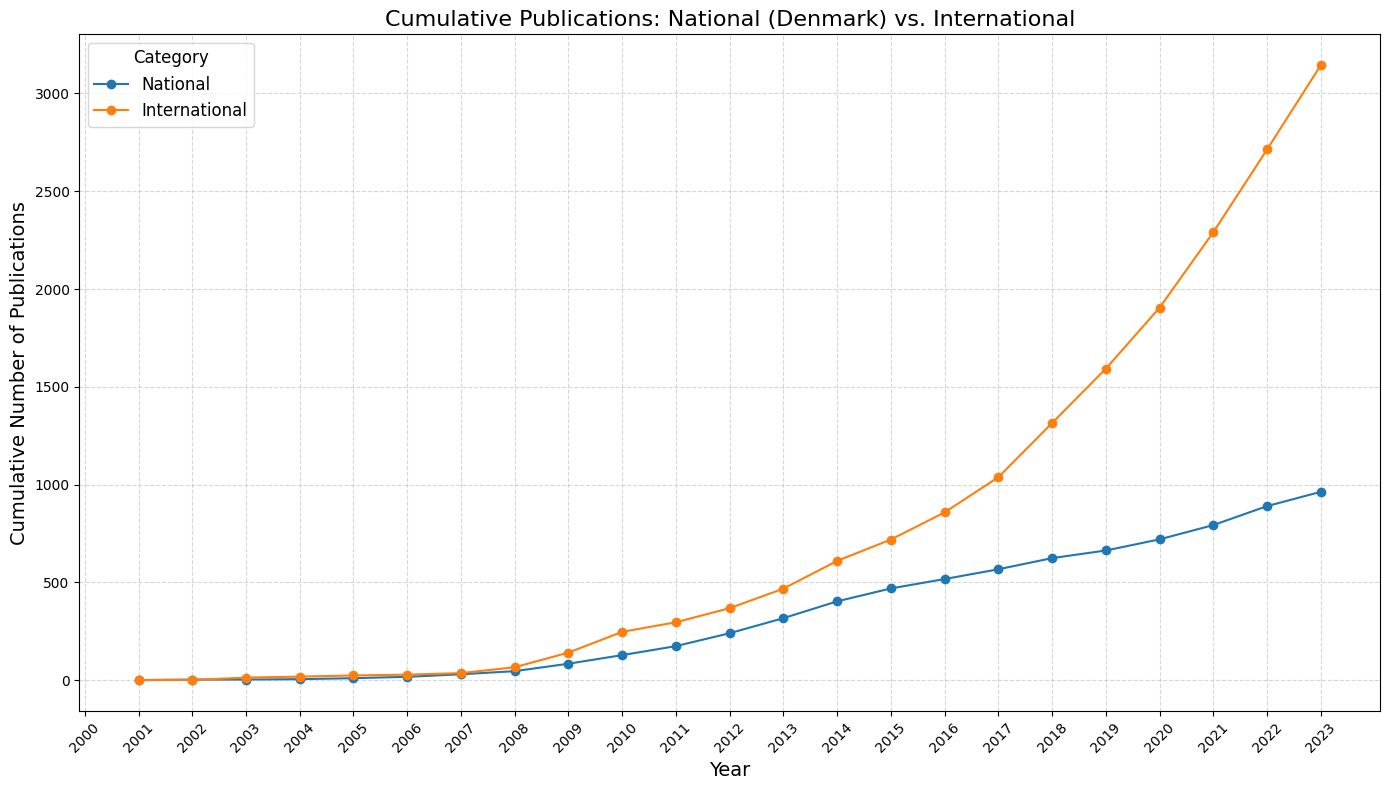

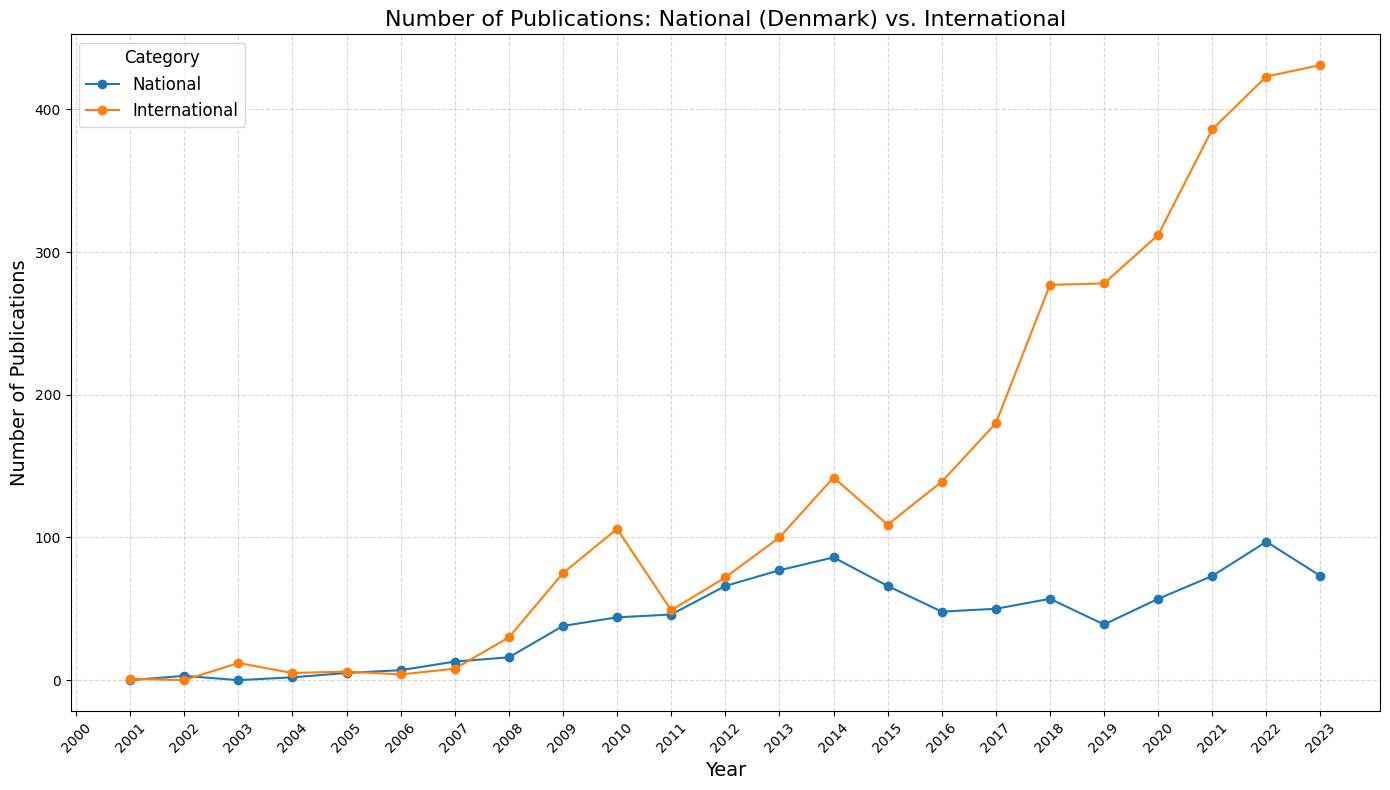

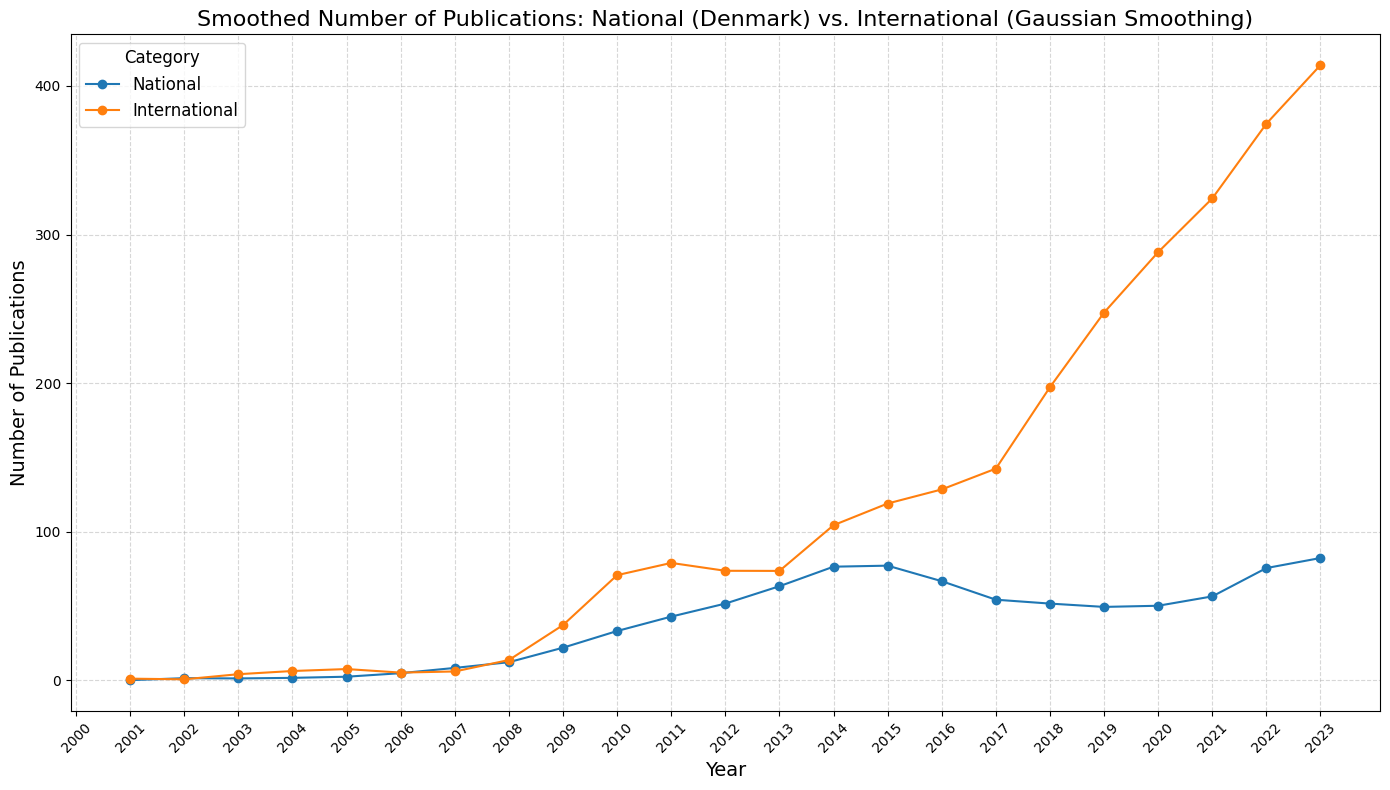

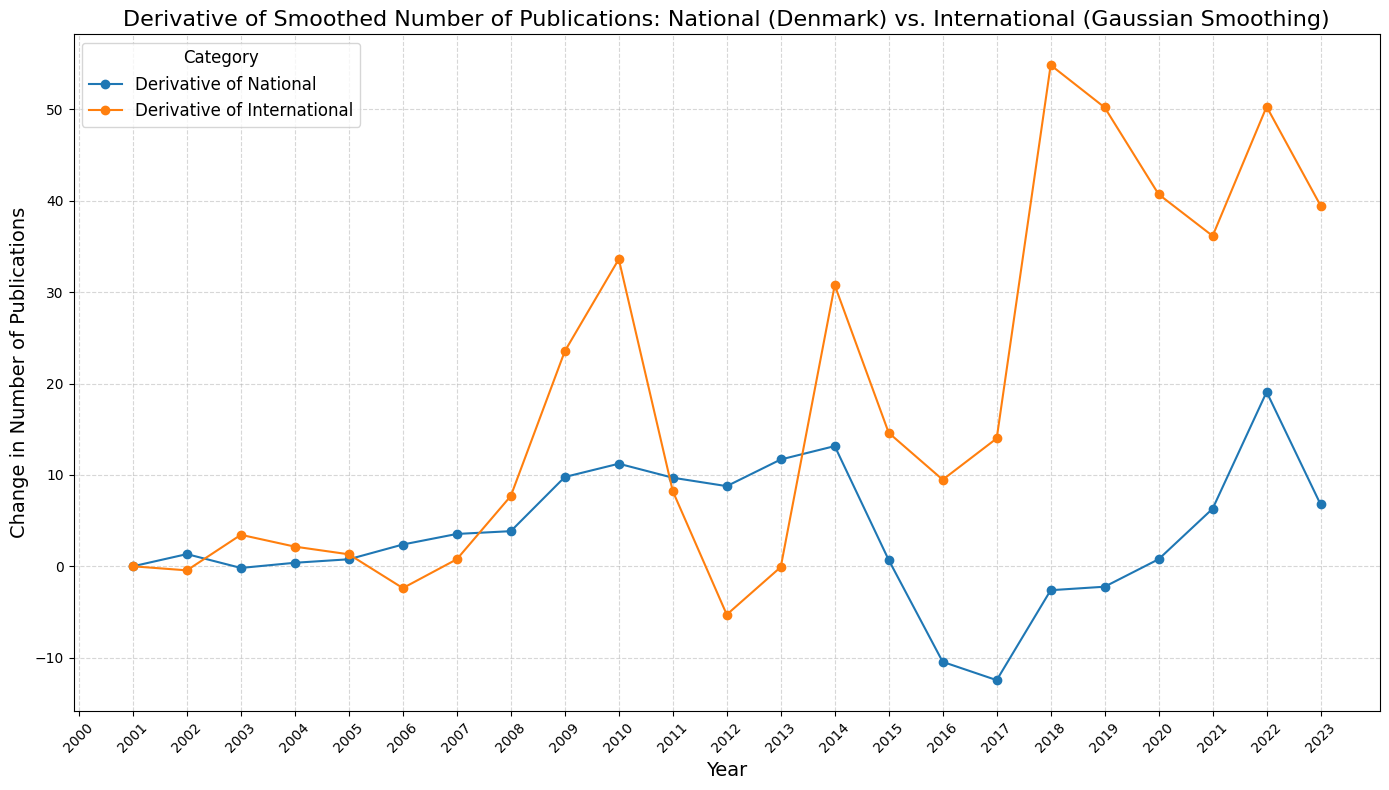

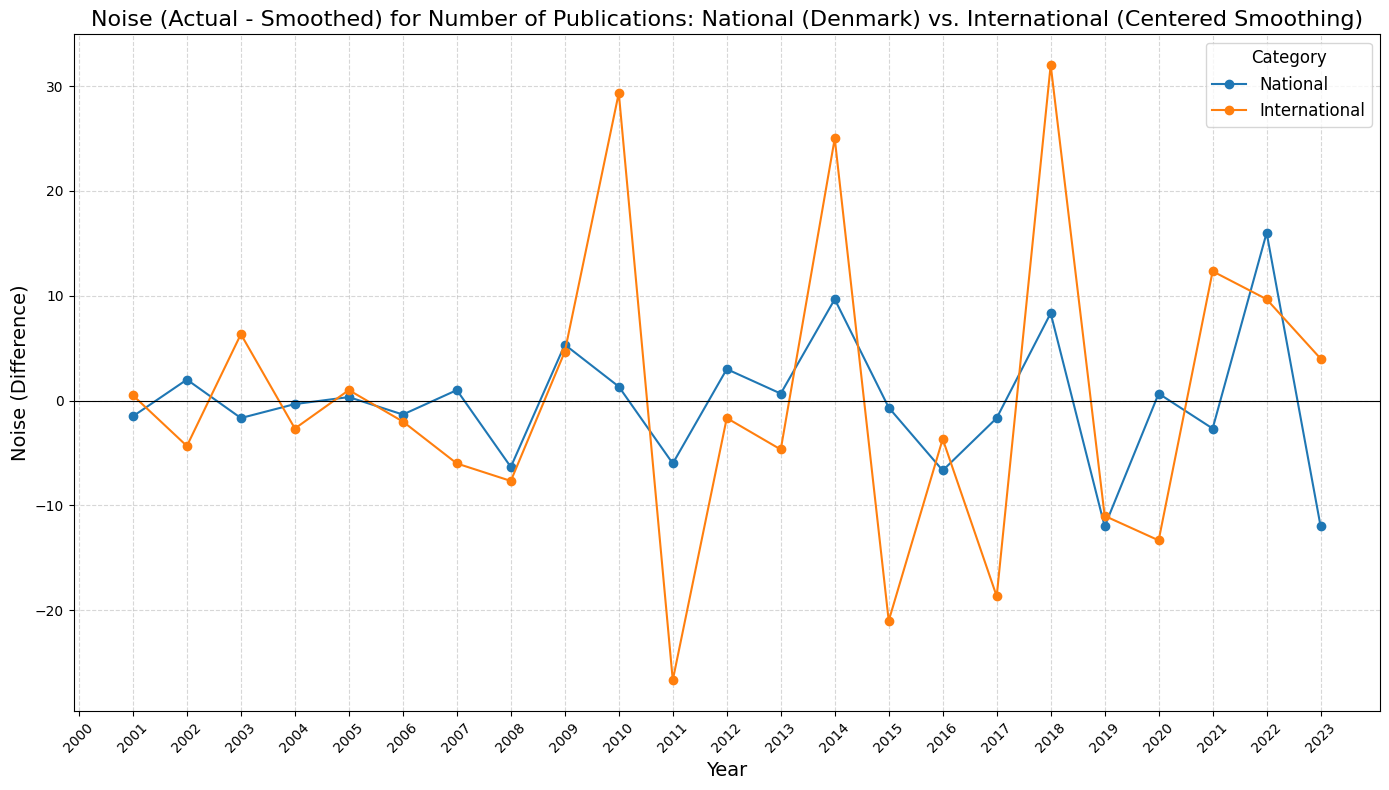

In [12]:
plot_cumulative_publications(df, years, top_n=10, international_cummulated=international_cummulated)
plot_publications(df, years, top_n=10, international_cummulated=international_cummulated)
#plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='centered', international_cummulated=international_cummulated)
plot_publications_smoothing(df, years, top_n=10, window=3, smoothing='gaussian', international_cummulated=international_cummulated)
plot_publications_derivative(df, years, top_n=10, window=3, smoothing='gaussian', international_cummulated=international_cummulated)
#plot_publications_smoothing(df, years, top_n=10, window=2, smoothing='gaussian', international_cummulated=international_cummulated)
plot_noise(df, years, top_n=10, window=3, smoothing='centered', international_cummulated=international_cummulated)
